In [1]:
from pathlib import Path
from datetime import datetime
import pandas as pd
from datasets import Dataset, DatasetDict

In [2]:
nations = Path('nations').glob('*.csv')

dataset = {
    'train': [],
    'validation': [],
    'test': [],
}

for key, nation in enumerate(nations):
    df = pd.read_csv(nation, index_col='Date')
    fx = df['FX'].tolist()

    start = datetime.strptime('2004-07-26', '%Y-%m-%d')
    # feat_dynamic_real = StandardScaler().fit_transform(df.drop(columns='FX').values)
    feat_dynamic_real = df.drop(columns='FX').values

    dataset['train'].append({
        'start': start,
        'target': fx[:-60],
        'feat_static_cat': [key],
        'feat_dynamic_real': feat_dynamic_real[:-60].T.tolist(),
        'item_id': nation.stem,
    })

    dataset['validation'].append({
        'start': start,
        'target': fx[:-30],
        'feat_static_cat': [key],
        'feat_dynamic_real': feat_dynamic_real[:-30].T.tolist(),
        'item_id': nation.stem,
    })

    dataset['test'].append({
        'start': start,
        'target': fx,
        'feat_static_cat': [key],
        'feat_dynamic_real': feat_dynamic_real.T.tolist(),
        'item_id': nation.stem,
    })

train_dataset = Dataset.from_list(dataset['train'])
validation_dataset = Dataset.from_list(dataset['validation'])
test_dataset = Dataset.from_list(dataset['test'])

dataset = DatasetDict({
    'train': train_dataset,
    'validation': validation_dataset,
    'test': test_dataset
})

In [5]:
len(dataset['test'][0]['target'])

5140

In [6]:
dataset['train'][0]['start']

datetime.datetime(2004, 7, 26, 0, 0)

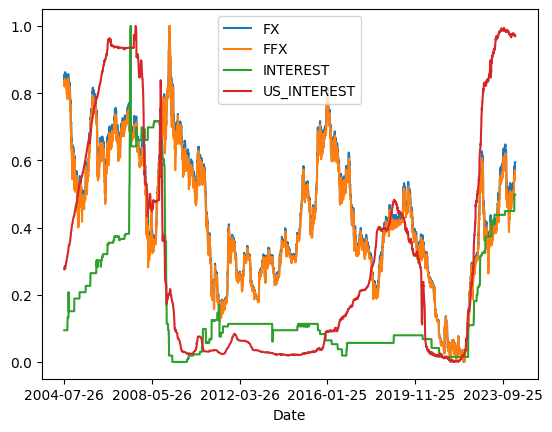

In [13]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

nations = Path('nations').glob('*.csv')

for nation in nations:    
    if nation.stem == "taiwan":
        df = pd.read_csv(nation, index_col=0)
        arr = MinMaxScaler().fit_transform(df.values)
        data = pd.DataFrame(arr, columns=df.columns, index=df.index)
        data.plot()
        plt.show()        
